In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [4]:
df = pd.read_csv("/Users/marchen/Desktop/programming/AI/13th week/file/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [5]:
df2 = df.iloc[:, 1:-2]
df2

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [6]:
X = df2[['Open', 'High', 'Low']].values
y = df2['Close'].values.reshape(-1, 1)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [10]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test  = X_test.reshape((X_test.shape[0],   X_test.shape[1],  1))

In [11]:
model = Sequential([
    # Conv1D: filters=32, kernel_size=2 → 세 개 피처 중 연속된 두 개 조합(feature) 학습
    Conv1D(filters=32, kernel_size=2, activation='relu', 
           input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')   # 회귀: 출력 노드 1개, 선형 활성화
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

/Users/marchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1, 64)          │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,557 (29.52 KB)

 Trainable params: 7,557 (29.52 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=2
)

Epoch 1/50
398/398 - 1s - 2ms/step - loss: 0.0765 - mae: 0.1412 - val_loss: 0.0037 - val_mae: 0.0410
Epoch 2/50
398/398 - 0s - 560us/step - loss: 0.0302 - mae: 0.1023 - val_loss: 0.0048 - val_mae: 0.0520
Epoch 3/50
398/398 - 0s - 559us/step - loss: 0.0262 - mae: 0.0981 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 4/50
398/398 - 0s - 564us/step - loss: 0.0270 - mae: 0.0982 - val_loss: 0.0015 - val_mae: 0.0281
Epoch 5/50
398/398 - 0s - 563us/step - loss: 0.0257 - mae: 0.0957 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 6/50
398/398 - 0s - 566us/step - loss: 0.0276 - mae: 0.0955 - val_loss: 0.0198 - val_mae: 0.0920
Epoch 7/50
398/398 - 0s - 562us/step - loss: 0.0260 - mae: 0.0944 - val_loss: 0.0142 - val_mae: 0.0808
Epoch 8/50
398/398 - 0s - 558us/step - loss: 0.0246 - mae: 0.0922 - val_loss: 0.0016 - val_mae: 0.0258
Epoch 9/50
398/398 - 0s - 563us/step - loss: 0.0260 - mae: 0.0942 - val_loss: 0.0020 - val_mae: 0.0309
Epoch 10/50
398/398 - 0s - 557us/step - loss: 0.0251 - mae: 0.0933 - val_lo

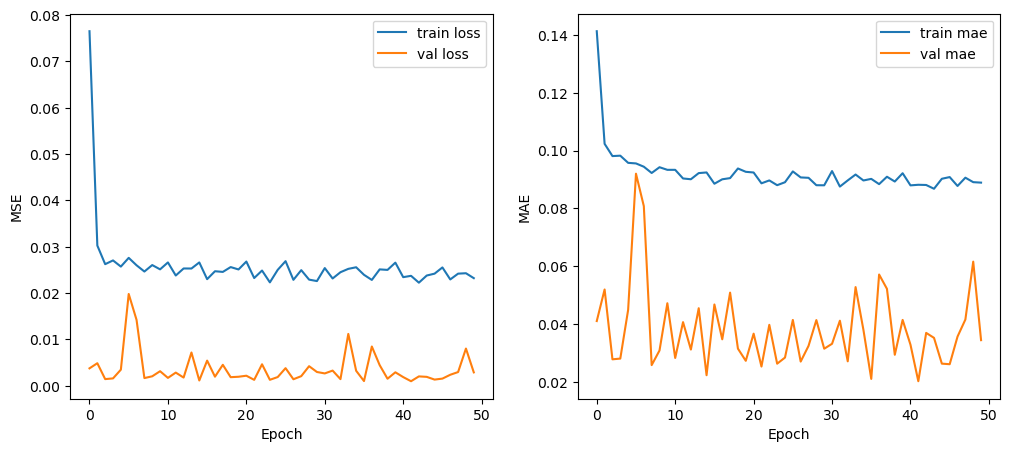

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.legend()

plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # 원래 스케일로 복원
y_true = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
print(f"MSE : {mse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R2  : {r2:.3f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
MSE : 0.017
MAE : 0.083
R2  : 0.997
